In [1]:
import gin
from data.ground_truth import named_data
with gin.unlock_config():
    gin.bind_parameter("dataset.name", "dsprites_full")
dataset = named_data.get_named_ground_truth_data()

./dataset_folder/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz



In [10]:
import numpy as np
com_matrix = np.zeros((4,3*40*8*8))
for k in range(3):
    for i in range(40):
        for m in range(8):
            for n in range(8):
                com_matrix[0,k*8*8*40+i*8*8 + m*8 + n] = k
                com_matrix[1,k*8*8*40+i*8*8 + m*8 + n] = i
                com_matrix[2,k*8*8*40+i*8*8 + m*8 + n] = m*4
                com_matrix[3,k*8*8*40+i*8*8 + m*8 + n] = n*4

scale = 2
latent_matrix = np.array([[0]*8*8*40*3,
        com_matrix[0,:],
        [scale]*8*8*40*3,
        com_matrix[1,:],
        com_matrix[2,:],
        com_matrix[3,:]])

In [241]:
com_matrix = np.zeros((2,32*32))
for m in range(32):
    for n in range(32):
        com_matrix[0,m*32 + n] = m
        com_matrix[1,m*32 + n] = n

                
scale = 5
shape = 1
orien = 24
latent_matrix = np.array([[0]*32*32,
        [shape]*32*32,
        [scale]*32*32,
        [orien]*32*32,
        com_matrix[0,:],
        com_matrix[1,:]])

In [242]:
latent_matrix = latent_matrix.T
def get_images_from_latent(dataset,latent_matrix):
    indices = np.array(np.dot(latent_matrix, dataset.factor_bases), dtype=np.int64)
    images = dataset.images[indices].astype(np.float32)
    return images

In [243]:
imgs = get_images_from_latent(dataset,latent_matrix)

In [244]:
imgs.shape

(1024, 64, 64)

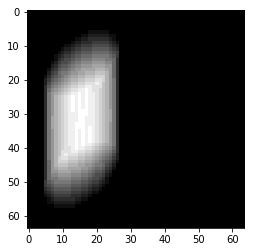

In [245]:
import matplotlib.pyplot as plt
plt.imshow(sum([imgs[i] for i in range(32)]),cmap='gray')

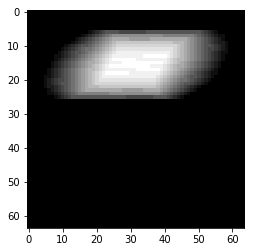

In [246]:
import matplotlib.pyplot as plt
plt.imshow(sum([imgs[32*i] for i in range(32)]),cmap='gray')

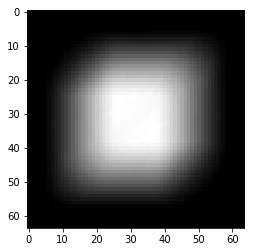

In [247]:
import matplotlib.pyplot as plt
plt.imshow(sum([imgs[i] for i in range(32*32)]),cmap='gray')

In [197]:
com_matrix = np.zeros((2,4*4))
for m in range(4):
    for n in range(4):
        com_matrix[0,m*4 + n] = m*10
        com_matrix[1,m*4 + n] = n*10

                
scale = 0
shape = 2
orien = 17
latent_matrix = np.array([[0]*4*4,
        [shape]*4*4,
        [scale]*4*4,
        [orien]*4*4,
        com_matrix[0,:],
        com_matrix[1,:]])

In [198]:
latent_matrix = latent_matrix.T
imgs = get_images_from_latent(dataset,latent_matrix)

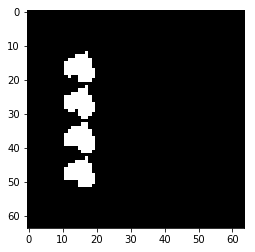

In [199]:
import matplotlib.pyplot as plt
plt.imshow(sum([imgs[i] for i in range(4)]),cmap='gray')

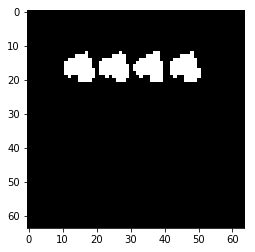

In [200]:
import matplotlib.pyplot as plt
plt.imshow(sum([imgs[4*i] for i in range(4)]),cmap='gray')

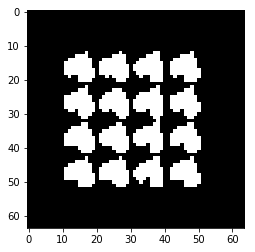

In [201]:
import matplotlib.pyplot as plt
plt.imshow(sum([imgs[i] for i in range(4*4)]),cmap='gray')

In [252]:
import numpy as np
num_shape = 3
num_orien = 40
num_x = 4
num_y = 4
com_matrix = np.zeros((4,3*40*4*4))
for k in range(num_shape):
    for i in range(num_orien):
        for m in range(num_x):
            for n in range(num_y):
                com_matrix[0,k*num_x*num_y*num_orien+i*num_x*num_y + m*num_x + n] = k
                com_matrix[1,k*num_x*num_y*num_orien+i*num_x*num_y + m*num_x + n] = i
                com_matrix[2,k*num_x*num_y*num_orien+i*num_x*num_y + m*num_x + n] = m*10
                com_matrix[3,k*num_x*num_y*num_orien+i*num_x*num_y + m*num_x + n] = n*10

scale = 0
latent_matrix = np.array([[0]*num_x*num_y*num_orien*num_shape,
        com_matrix[0,:],
        [scale]*num_x*num_y*num_orien*num_shape,
        com_matrix[1,:],
        com_matrix[2,:],
        com_matrix[3,:]])

In [253]:
latent_matrix = latent_matrix.T
imgs = get_images_from_latent(dataset,latent_matrix)

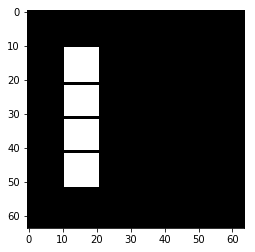

In [254]:
import matplotlib.pyplot as plt
plt.imshow(sum([imgs[i] for i in range(4)]),cmap='gray')

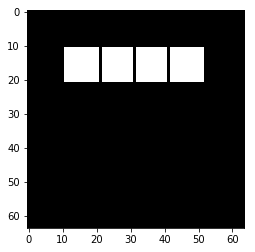

In [255]:
import matplotlib.pyplot as plt
plt.imshow(sum([imgs[4*i] for i in range(4)]),cmap='gray')

In [256]:
imgs.shape

(1920, 64, 64)

In [273]:
np.savez("./dataset_folder/np_imgs1920", imgs=imgs)

In [271]:
def show_images_grid(imgs_, num_images=25):
    ncols = int(np.ceil(num_images**0.5))
    nrows = int(np.ceil(num_images / ncols))
    _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
    axes = axes.flatten()

    for ax_i, ax in enumerate(axes):
        if ax_i < num_images:
            ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis('off')

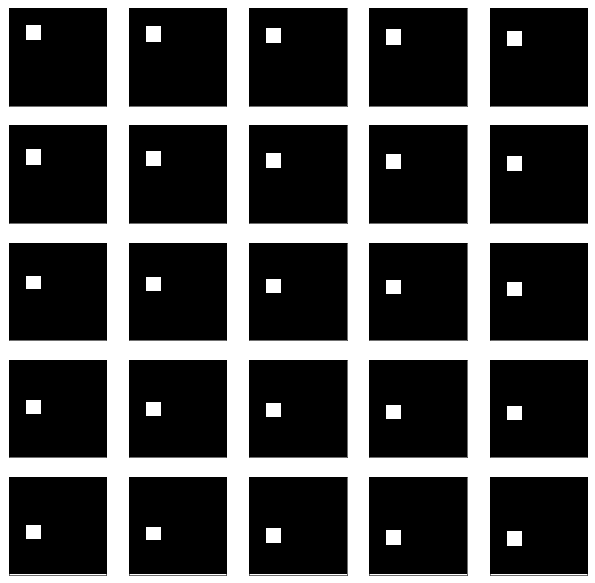

In [272]:
show_images_grid(dataset.images[:25], num_images=25)

In [276]:
data = np.load("./dataset_folder/np_imgs1920.npz")

In [277]:
np.max(data['imgs'])

1.0